Мировой рейтинг университетов ([kaggle](https://www.kaggle.com/mylesoneill/world-university-rankings))

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Чтение данных. Какие русские университеты входят в список?

In [2]:
data = pd.read_csv('cwurData.csv', header=0)
print(data.shape)
print(data[['institution', 'year']][data['country'] == 'Russia'])

(2200, 14)
                                     institution  year
189            Lomonosov Moscow State University  2013
247            Lomonosov Moscow State University  2014
484            Saint Petersburg State University  2014
1115                Novosibirsk State University  2014
1258           Lomonosov Moscow State University  2015
1449  Moscow Institute of Physics and Technology  2015
1605           Saint Petersburg State University  2015
1954  National Research Nuclear University MEPhI  2015
2184                Novosibirsk State University  2015


In [3]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


Данные в столбцах представляют собой рейтинг в данной категории. Поэтому, чем меньше значение, тем лучше.

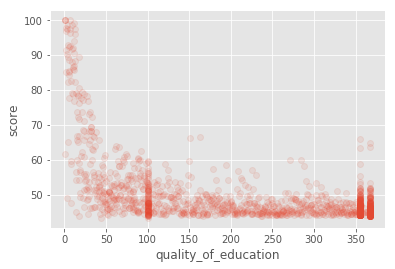

In [4]:
plt.plot(data['quality_of_education'], data['score'], 'o', alpha=0.1)
plt.xlabel('quality_of_education')
plt.ylabel('score')
pass

В таблице присутствуют данные за 2012, 2013, 2014 и 2015 года. Возьмем данные только за 2015 год. Как видно, пропущенных значений нет.

In [5]:
data = data.loc[data['year'] == 2015]
print(data.count())

world_rank              1000
institution             1000
country                 1000
national_rank           1000
quality_of_education    1000
alumni_employment       1000
quality_of_faculty      1000
publications            1000
influence               1000
citations               1000
broad_impact            1000
patents                 1000
score                   1000
year                    1000
dtype: int64


Некоторые столбцы нас не интересуют, удалим их. Столбец "world_rank" нас не интересует, так как присутствует столбец "score", из которого и получается ранг.

In [6]:
data.drop(['institution', 'world_rank', 'year'], axis=1, inplace=True)

Распределим столбцы на категориальные и числовые

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country']
['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score']


Проверим есть ли в категориальных данных бинарные. Бинарных данных нет.

In [8]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country']


Рассмотрим столбец "Страна" и векторизуем его

In [9]:
data['country'].unique()

array(['USA', 'United Kingdom', 'Japan', 'Switzerland', 'Israel',
       'South Korea', 'Canada', 'France', 'China', 'Taiwan', 'Russia',
       'Singapore', 'Sweden', 'Denmark', 'Germany', 'Belgium',
       'Netherlands', 'Australia', 'Norway', 'Finland', 'Italy', 'Spain',
       'Brazil', 'South Africa', 'Hong Kong', 'Ireland', 'Austria',
       'Portugal', 'New Zealand', 'Czech Republic', 'Greece', 'Thailand',
       'Mexico', 'India', 'Argentina', 'Chile', 'Poland', 'Hungary',
       'Iceland', 'Turkey', 'Malaysia', 'Slovenia', 'Estonia', 'Croatia',
       'Saudi Arabia', 'Colombia', 'Lebanon', 'Slovak Republic', 'Iran',
       'Serbia', 'Lithuania', 'Egypt', 'Bulgaria', 'Uruguay', 'Uganda',
       'Cyprus', 'United Arab Emirates', 'Puerto Rico', 'Romania'],
      dtype=object)

In [10]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Belgium', 'country_Brazil', 'country_Bulgaria',
       'country_Canada', 'country_Chile', 'country_China', 'country_Colombia',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Denmark', 'country_Egypt', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Greece', 'country_Hong Kong', 'country_Hungary',
       'country_Iceland', 'country_India', 'country_Iran', 'country_Ireland',
       'country_Israel', 'country_Italy', 'country_Japan', 'country_Lebanon',
       'country_Lithuania', 'country_Malaysia', 'country_Mexico',
       'country_Netherlands', 'country_New Zealand', 'country_Norway',
       'country_Poland', 'country_Portugal', 'country_Puerto Rico',
       'country_Romania', 'country_Russia', 'country_Saudi Arabia',
       'country_Serbia', 'country_Singapore', 'country_Slovak Republic',
       'country_Slovenia', 

Числовые данные нормализуем

In [11]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

Соеденим получившиеся данные

In [12]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary), axis=1), dtype=int)
print(data.shape, data.columns)

(1000, 69) Index(['national_rank', 'quality_of_education', 'alumni_employment',
       'quality_of_faculty', 'publications', 'influence', 'citations',
       'broad_impact', 'patents', 'score', 'country_Argentina',
       'country_Australia', 'country_Austria', 'country_Belgium',
       'country_Brazil', 'country_Bulgaria', 'country_Canada', 'country_Chile',
       'country_China', 'country_Colombia', 'country_Croatia',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Egypt', 'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Greece', 'country_Hong Kong',
       'country_Hungary', 'country_Iceland', 'country_India', 'country_Iran',
       'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan',
       'country_Lebanon', 'country_Lithuania', 'country_Malaysia',
       'country_Mexico', 'country_Netherlands', 'country_New Zealand',
       'country_Norway', 'country_Poland', 'country_Portugal',
    

Подготовим данные для обучения

In [13]:
X = data.drop(['score'], axis=1)
y = data['score']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(1000, 68) (1000,)


Разделим данные на обучающую и тренировучную выборки

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

200 800


C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Используем классификатор "k ближайших соседей". Количество соседей = 10.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [16]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.08 0.06


Сразу хорошие показатели: ошибка на тренировочных данных 0,08; на тестовых - 0,06. Попробуем еще снизить ошибку методом кросс валидации и перебором числа соседей.

In [17]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.07999999999999996 10


C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Результат - 10 соседей является оптимальным параметром.

## Полносвязная нейронная сеть

Пробуем полносвязную нейронную сеть с одним скрытым слоем:

In [55]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(1,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.045 0.0575


Видим небольшое улучшение по сравнению с методом k ближайших соседей. Попробуем 2 скрытых слоя

In [59]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.03 0.05625


Видно небольшое уменьшение ошибки на тестовых данных. Но при этом разница между тренировочной и тестовой ошибками возрастает. Это указывает на переобучение. Для полноты эксперимента попробуем 3 скрытых слоя:

In [60]:
mlp_model = MLPClassifier(hidden_layer_sizes=(3,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.02 0.07


Переобучение наглядно ^  Проведя эксперименты с увеличением количества скрытых слоев, я заметил, что переобучение постоянно возрастает. Попробуем перебрать некоторые значения гиперпарметра alpha.

In [132]:
alpha_arr = np.logspace(-10, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(1,), solver='lbfgs', 
                              activation='logistic', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

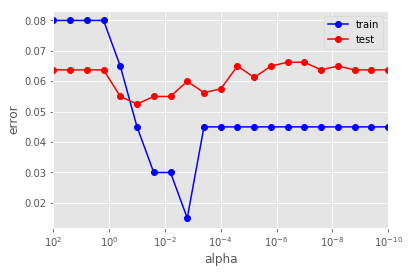

In [133]:
plt.semilogx(alpha_arr, train_err, 'b-o', label='train')
plt.semilogx(alpha_arr, test_err, 'r-o', label='test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Найдем то оптимальное значение alpha:

In [134]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[0.1]


Посчитаем значения с этой alpha:

In [135]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(1,), solver='lbfgs',
                          activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.045
0.0525


## Random Forest

Используем классификатор "Случайный лес"

In [82]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

0.01 0.05875


При количестве деревьев 10 видна ситуация переобучения. Попробуем перебрать несколько значений:

In [112]:
trees_arr = np.arange(1, 50, 5)
test_err = []
train_err = []
oob_err = []

for tree in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=tree, oob_score=True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs 

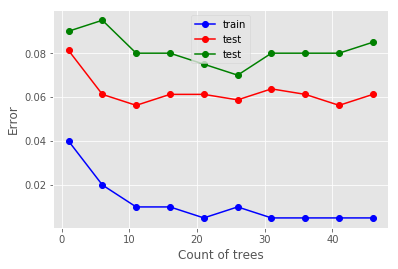

In [115]:
plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='test')
plt.xlabel('Count of trees')
plt.ylabel('Error')
plt.legend()
pass

На всем графике видна проблема с переобучением. Данный классификатор не подходит для нашей задачи.

## Extremely random forests

In [95]:
ert = ensemble.ExtraTreesClassifier(n_estimators=10)
ert.fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

0.005 0.0575


Та же ситуация с переобучением. Эксперименты:

In [102]:
trees_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
oob_err = []
for tree in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators=tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\happy\Anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs 

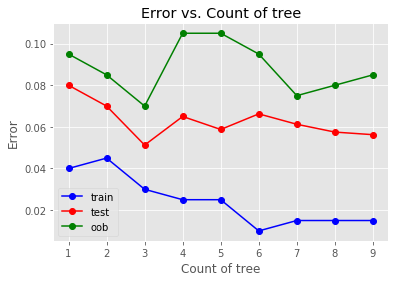

In [103]:
plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='oob')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Опять переобучение. Алгоритм так же не подходит для наших данных.

## Adaboost

In [116]:
ab = ensemble.AdaBoostClassifier(n_estimators=5)
ab.fit(X_train, y_train)

err_train = np.mean(y_train != ab.predict(X_train))
err_test = np.mean(y_test != ab.predict(X_test))

print(err_train, err_test)

0.935 0.96125


Переобучения не наблюдается. Но ошибка выходит за рамки разумного. Пробуем перебор:

In [117]:
estimator_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators=estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test != ab.predict(X_test)))

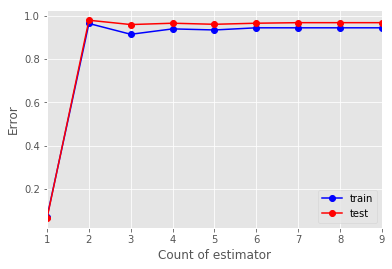

In [118]:
plt.plot(estimator_arr, train_err, 'b-o', label='train')
plt.plot(estimator_arr, test_err, 'r-o', label='test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [120]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err, min_test_err)

0.07 0.065


При количестве деревьев = 1 получаются непдохие результаты. Но все же хуже, чем k ближайших соседей и полносвязной сети.

## Gradient boosted trees

In [122]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=10)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.025 0.0625


Опять наблюдается переобучение. Пробуем перебрать разные значения для количества деревьев:

In [123]:
tree_arr = np.arange(1, 50, 2)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators=tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

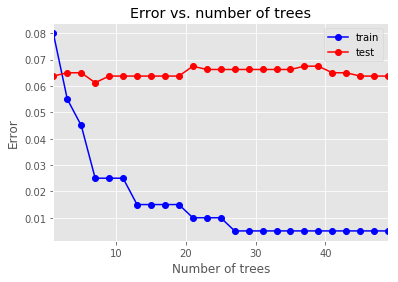

In [124]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Ни к чему хорошему этот алгоритм тоже не приводит.

## Principal Components Analysis

С помощью метода главных компонент пробуем уменьшить размерность исходных данных.

In [125]:
X.shape

(1000, 68)

Исходные данные имеют 68 столбцов. Уменьшим их в 2 раза - до 30:

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X_train)


pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)
print(pca_x_train.shape, pca_x_test.shape)

(200, 30) (800, 30)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Используем классификатор, который показал наилучший результат в экспериментах - Полносвязную нейронную сеть (alpha = 0.1). И пробуем различные значения для количества компонент.

In [136]:
alpha = 0.1
components_arr = np.arange(1, 68, 1)
test_err = []
train_err = []

for number in components_arr:
    pca = PCA(n_components=number)
    pca.fit(X_train)
    pca_x_train = pca.transform(X_train)
    pca_x_test = pca.transform(X_test)
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(1,), solver='lbfgs', 
                              activation='logistic', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


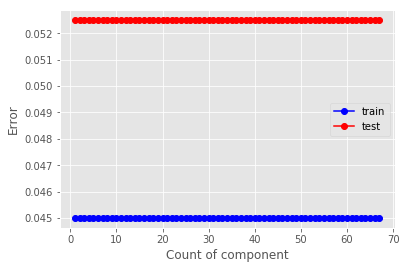

In [137]:
plt.plot(components_arr, train_err, 'b-o', label='train')
plt.plot(components_arr, test_err, 'r-o', label='test')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Из графика видно, что метод главных компонент никак не влияет на уменьшение ошибки.